In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [2]:
### Importing the dataframes from kaggle (just copy & paste)

file_path = "train.csv"
# Load the latest version
df_train = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "andonians/random-linear-regression",
  file_path,
)

file_path_test = "test.csv"

df_test = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "andonians/random-linear-regression",
  file_path_test,
)


C:\Users\Sinesio-PC\AppData\Local\Temp\ipykernel_27100\2982205391.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_train = kagglehub.load_dataset(
C:\Users\Sinesio-PC\AppData\Local\Temp\ipykernel_27100\2982205391.py:13: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_test = kagglehub.load_dataset(


In [3]:
## Checking the first DataFrame.

df_test.head(), df_test.shape

(    x          y
 0  77  79.775152
 1  21  23.177279
 2  22  25.609262
 3  20  17.857388
 4  36  41.849864,
 (300, 2))

In [4]:
## Checking the Second Dataframe

df_train.head(), df_train.shape

(      x          y
 0  24.0  21.549452
 1  50.0  47.464463
 2  15.0  17.218656
 3  38.0  36.586398
 4  87.0  87.288984,
 (700, 2))

In [5]:
### Creating a bigger dataframe for better adaptation of the model
df = pd.concat([df_train,df_test], ignore_index=False)
df.head(), df.shape

(      x          y
 0  24.0  21.549452
 1  50.0  47.464463
 2  15.0  17.218656
 3  38.0  36.586398
 4  87.0  87.288984,
 (1000, 2))

In [6]:
#### Checking for NaN values and substituing them for the media
df.isna().value_counts()
df["y"] = df["y"].fillna(df["y"].median())
df.shape

(1000, 2)

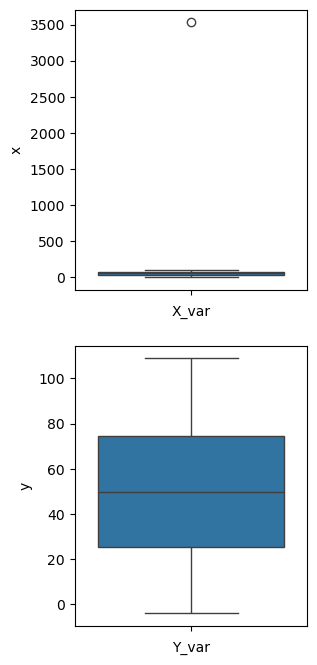

In [7]:
## Searching for Outliers

fig, ax = plt.subplots(2, figsize =(3,8))

##

sns.boxplot(data = df["x"], ax = ax[0])
ax[0].set_xlabel("X_var")

###

sns.boxplot(data = df["y"], ax = ax[1])
ax[1].set_xlabel("Y_var")

###
plt.show()

In [8]:
#### Removing the outlier.
dfcop = df.copy()

Q1 = dfcop["x"].quantile(0.25)
Q3 = dfcop["x"].quantile(0.75)
IRQ = Q3 - Q1


dfcop.loc[(dfcop["x"] >= Q3 + 1.5 * IRQ) | (dfcop["x"] <= Q1 -1.5*IRQ), "x"] = df['x'].median() 
dfcop.describe()


,x,y
count,1000.000000,1000.000000
mean,50.291000,50.319410
std,28.794504,29.074551
min,0.000000,-3.839981
25%,25.000000,25.227574
50%,50.000000,49.926397
75%,74.250000,74.463198
max,100.000000,108.871618


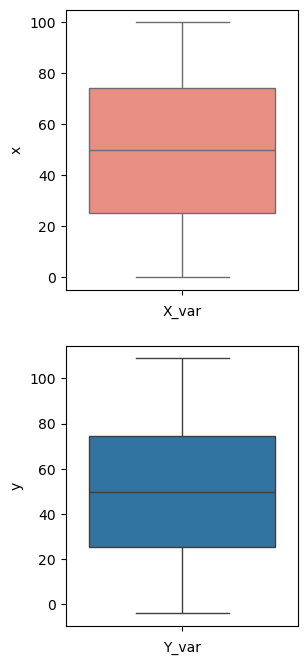

In [9]:
## Searching for Outliers

fig, ax = plt.subplots(2, figsize =(3,8))

##

sns.boxplot(data = dfcop["x"], ax = ax[0], color = "Salmon")
ax[0].set_xlabel("X_var")

###

sns.boxplot(data = dfcop["y"], ax = ax[1])
ax[1].set_xlabel("Y_var")

###
plt.show()

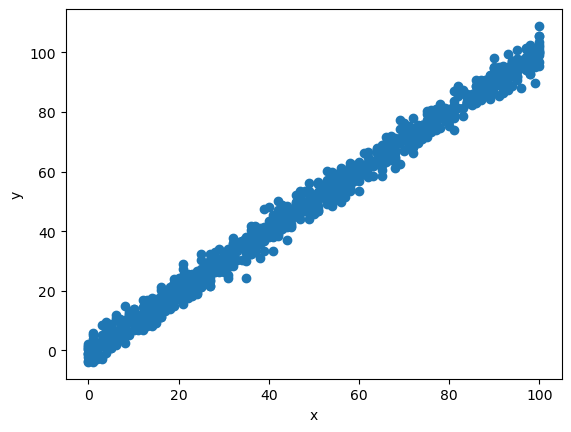

In [10]:
### Visualizing the data

plt.scatter(dfcop["x"],dfcop["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [11]:
### Making the model

# Separating the variables
X = dfcop[["x"]]
y = dfcop["y"]


In [12]:
## Training the model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 10)

In [18]:
# Applying the linear regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_test,y_test)
y_pred = model.predict(X = X_test)

In [19]:
# Taking the coeficient and the intercpetation (y = ax + b)
a, b = [model.coef_, model.intercept_]


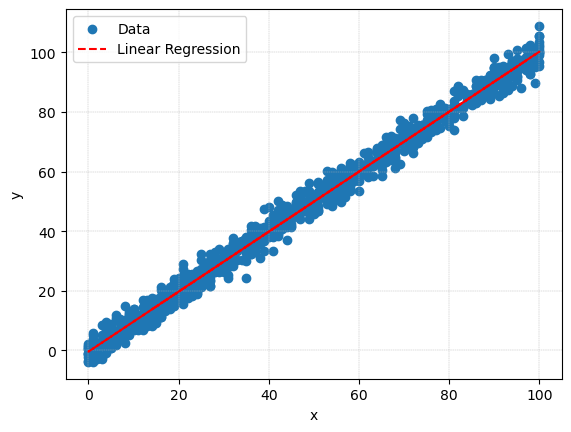

In [22]:
## ploting the results
plt.scatter(dfcop["x"],dfcop["y"], label = "Data")
plt.plot(X_test, y_pred, "--r", label = "Linear Regression")
plt.grid(True, lw = 0.3, ls = "--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

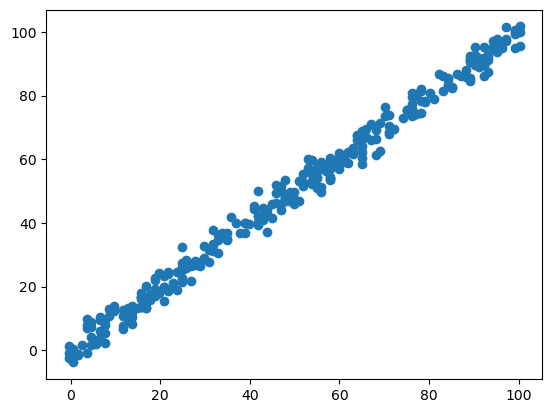

In [38]:
plt.scatter(y_pred, y_test)

In [21]:
### Seing the model quality

print(f"R^2 = {skt.metrics.r2_score(X_test, y_pred)}")
print(f"The mean absolute error is {skt.metrics.mean_absolute_error(y_test, y_pred)}")
print(f"The mean absolute percent error is {skt.metrics.mean_absolute_percentage_error(y_test, y_pred)}")
print(f"The mean squared error is {skt.metrics.mean_squared_error(y_test, y_pred)}")
print(f"The root mean squared error is {np.sqrt(skt.metrics.mean_squared_error(y_test, y_pred))}")

R^2 = 0.9999545215287231
The mean absolute error is 2.249394333434886
The mean absolute percent error is 0.1435266594070962
The mean squared error is 7.987806955492867
The root mean squared error is 2.826270856710812


In [40]:
residuals = y_test - y_pred 

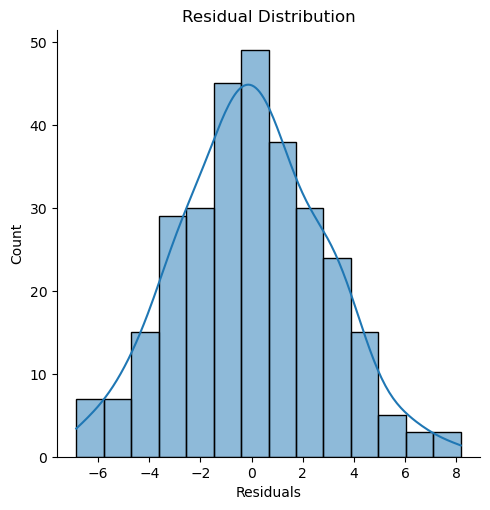

In [55]:
sns.displot(residuals, kde = True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

In [57]:
### Shapiro-Wilk test checking the normality of the residuals
from scipy.stats import shapiro
from scipy.stats import probplot
shapiro(residuals)
probplot(residuals

ShapiroResult(statistic=np.float64(0.9968020870261453), pvalue=np.float64(0.8161438239616108))